In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset to the python environment.

In [2]:
data=pd.read_excel(r'desktop\iris.xls')

In [3]:
data.head(4)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


classification is a catagarical variable convert into numerical

In [6]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

here was three catagory each have 50 sample size

In [7]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


PL has higher sd compared to other feature,SL has highest mean,pw has lowest 

#  pre-processing steps.

# missing value

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

here variable SL,SW and PL are  missing value

In [9]:
for i in['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].mean())


In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

we can fill the misiing value in mean of their resepetive columns

# outlier

In [11]:
data.head(2)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# SL

Text(0.5, 1.0, 'box plot of SL')

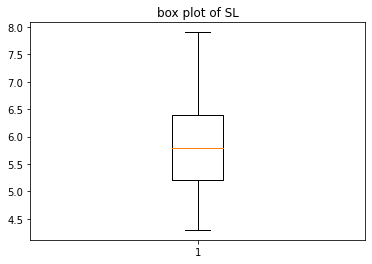

In [12]:
plt.boxplot(data['SL'])
plt.title("box plot of SL")

 No outlier 

# SW

Text(0.5, 1.0, 'box plot of SW')

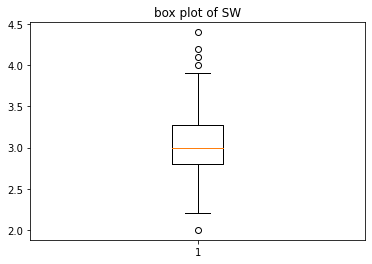

In [13]:
plt.boxplot(data['SW'])
plt.title("box plot of SW")

presence of outlier 

# PL

Text(0.5, 1.0, 'box plot of PL ')

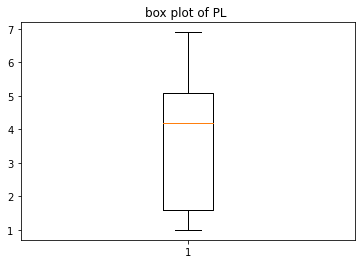

In [14]:
plt.boxplot(data['PL'])
plt.title("box plot of PL ")

No outlier

# PW

Text(0.5, 1.0, 'box plot of PW ')

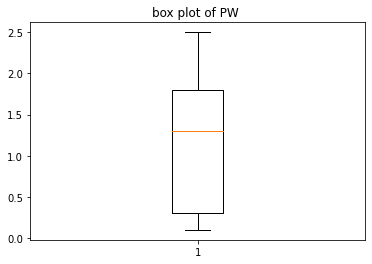

In [15]:
plt.boxplot(data['PW'])
plt.title("box plot of PW ")

No outlier

In [16]:
# ony outlier in SW we can remove outlier in IQR method

In [17]:
Q1 =np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 =np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 =np.percentile(data['SW'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [18]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [19]:
low_lim=Q1-1.5*IQR
hig_lim=Q3+1.5*IQR
print(low_lim)
print(hig_lim)

2.1249999999999996
3.9250000000000003


any value samller than low and greater  than hig is taken by outlier

In [20]:
out_1=data['SW']< low_lim
ind_1=data.loc[out_1].index
print(ind_1)

Int64Index([60], dtype='int64')


In [21]:
out_2=data['SW']> hig_lim
ind_2=data.loc[out_2].index
print(ind_2)

Int64Index([14, 15, 32, 33], dtype='int64')


we can drop the outlier

In [22]:
data.drop([60,14, 15, 32, 33],inplace=True)

In [23]:
data.shape

(145, 5)

 data set now 145 rows and five columns

In [24]:
x=data.drop(["Classification"],axis=1)
y=data['Classification']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [27]:
x_train.shape

(116, 4)

In [28]:
x_test.shape

(29, 4)

# KNN model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix             

In [39]:
acc_values = []
neighbors = np.arange(2,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model=Classifier.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc= accuracy_score(y_test,pred)
    acc_values.append(acc)

In [40]:
print(acc_values)

[0.8620689655172413, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.896551724137931, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.8620689655172413]


Text(0, 0.5, 'accuracy score')

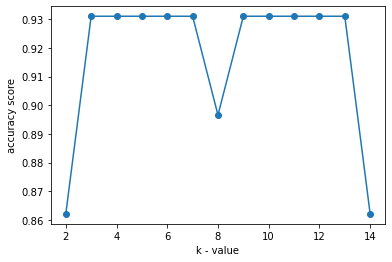

In [41]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k - value')
plt.ylabel('accuracy score')

from the above garph we can see 3,4,5,6,7,9,10,11,12,and 13 produce model with hih accurcay
we choose any one that so i choose k-value=6

In [43]:
Classifier=KNeighborsClassifier(n_neighbors=6, metric='minkowski')
model=Classifier.fit(x_train,y_train)
pred=model.predict(x_test)
acc= accuracy_score(y_test,pred)
acc_values.append(acc)

In [46]:
print('accurcy score:',accuracy_score(y_test,pred))




accurcy score: 0.9310344827586207


In [47]:
print('confusion matrix:',confusion_matrix(y_test,pred))


confusion matrix: [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


 they are only 2 miss classification or missing value

# logestic regression

In [48]:
from sklearn.linear_model import LogisticRegression


In [50]:
LR=LogisticRegression()

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
LR.fit(x_train,y_train)

LogisticRegression()

In [54]:
pred=LR.predict(x_test)

In [55]:
print('accurcy score:',accuracy_score(y_test,pred))



accurcy score: 0.896551724137931


In [56]:
print('confusion matrix:',confusion_matrix(y_test,pred))


confusion matrix: [[9 0 0]
 [0 8 1]
 [0 2 9]]


# Decission tree classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
pred=DT_model.predict(x_test)

In [63]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 0.896551724137931
confusion matrix: [[9 0 0]
 [0 8 1]
 [0 2 9]]


# support vector machine svm

# 1 Linear SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [66]:
pred=svm.predict(x_test)

In [67]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 0.896551724137931
confusion matrix: [[9 0 0]
 [0 8 1]
 [0 2 9]]


# 2 Polinominal SVM

In [68]:
 from sklearn.svm import SVC

In [73]:
svm_poly=SVC(kernel='poly',degree=3)
model=svm_poly.fit(x_train,y_train)
pred=model.predict(x_test)

In [74]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 0.9655172413793104
confusion matrix: [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


only one misclassification

# 3 Radial SVM

In [75]:
svm_rbf=SVC(kernel='rbf')
model=svm_rbf.fit(x_train,y_train)
pred=model.predict(x_test)

In [76]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 0.8620689655172413
confusion matrix: [[9 0 0]
 [0 8 1]
 [0 3 8]]


4 missclasification and 86% accurcy

# Random forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
pred=model.predict(x_test)

In [79]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 0.896551724137931
confusion matrix: [[9 0 0]
 [0 8 1]
 [0 2 9]]


 3 missclasification

In [80]:
# form the above classification model
#svm with poly nominal kernel degree 3 giv the hihest accuracy and
#lowest missclasification